In [1]:
import os
import sys
from pathlib import Path
from mxlpy import units

import matplotlib.pyplot as plt
from GreenSlothUtils.demonstration import (
    create_day_simulation_fig,
    create_fvcb_fig,
    create_mca_fig,
    create_pam_fig,
    create_pamfit,
)

sys.path.append(os.path.abspath('..'))

from model import Saadat2021

    
def save_fig(fig_name: str, add_name: bool = False) -> Path:
    here = Path("").absolute()
    name = "Saadat2021"
    plt.savefig(here / f"{name.lower()}_demon_{fig_name}.svg", format="svg", bbox_inches="tight")
    if add_name:
        plt.text(0.5, 1, transform=plt.gcf().transFigure, s=name, fontsize=16, fontweight="bold", ha="center")
        plt.savefig(here / f"{name.lower()}_present_{fig_name}.svg", format="svg", bbox_inches="tight")
    

# Str Dictionary

In [2]:
pfd_str = "PPFD"
vc_str = "v_RuBisCO_c"
atp_str = "ATP_st"
nadph_str = "NADPH_st"
flourescence_str = "Fluo"
co2_str = "CO2"
pco2_str = None
H_cp_co2_str = None
gammastar_str = None
r_light_str = None
A_str = None
tend_quasi= None
npq_str = None
coeff_psii_str = "k2"
coeff_psi_str = None
coeff_rubisco_str = "kcat_v_RuBisCO_c"
coeff_cytb6f_str = "kcat_v_b6f"
coeff_atp_synthase_str = "kf_v_ATPsynth"
rubp_str = "RUBP"
pq_str = "PQ"
pc_str = "PC_ox"
v_psii_str = "v_PSII"
v_psi_str = "v_PSI"
v_cytb6f_str = "v_b6f"
v_atp_synthase_str = "v_ATPsynth"

# Day Simulation

Trying simulation with 700 time points per step.


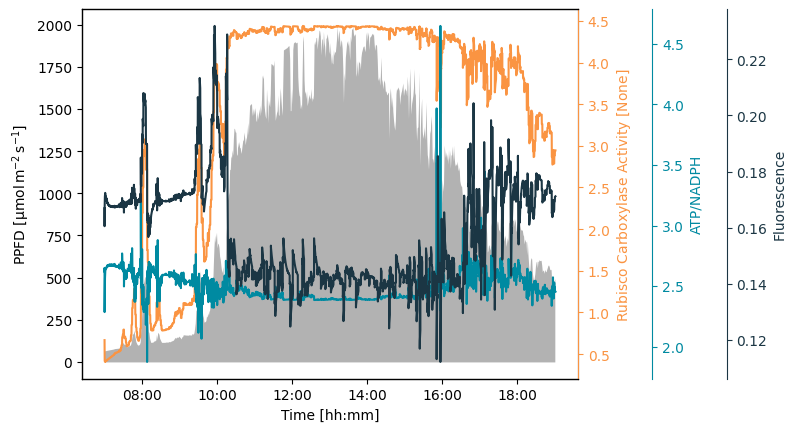

In [3]:
create_day_simulation_fig(
    model=Saadat2021(),
    pfd=pfd_str,
    vc=vc_str,
    atp=atp_str,
    nadph=nadph_str,
    flourescence=flourescence_str,
)

save_fig("daysimulation")

# FvCB Comparision

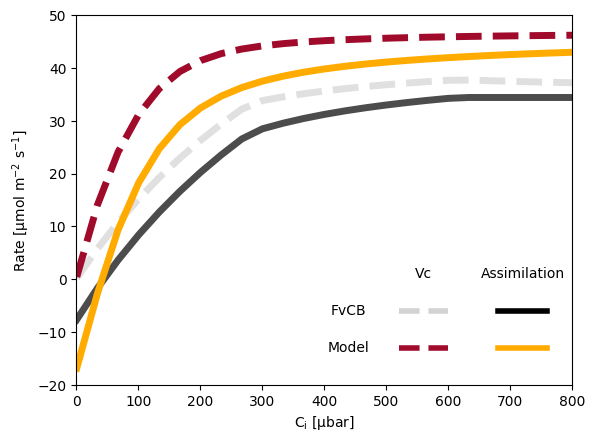

In [4]:
m = Saadat2021()

m.update_reaction(vc_str, unit=units.mmol / (units.liter * units.second))

create_fvcb_fig(
    model=m,
    pfd=pfd_str,
    co2=co2_str,
    vc=vc_str,
    pco2=pco2_str,
    H_cp_co2=H_cp_co2_str,
    gammastar=gammastar_str,
    r_light=r_light_str,
    A=A_str,
    tend_quasi=tend_quasi
)

save_fig("fvcb")

# PAM Sample

Trying pam-simulation with 200 time points per step.


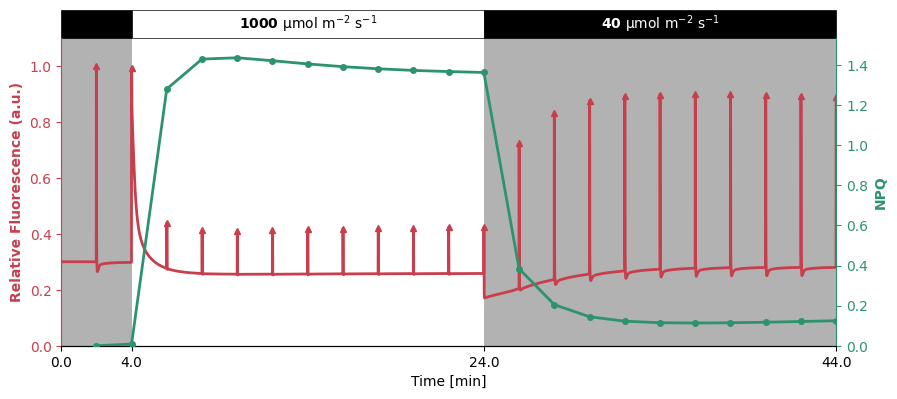

In [5]:
create_pam_fig(
    model=Saadat2021(),
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=npq_str,
)

save_fig("pam")

# Photosynthesis MCA

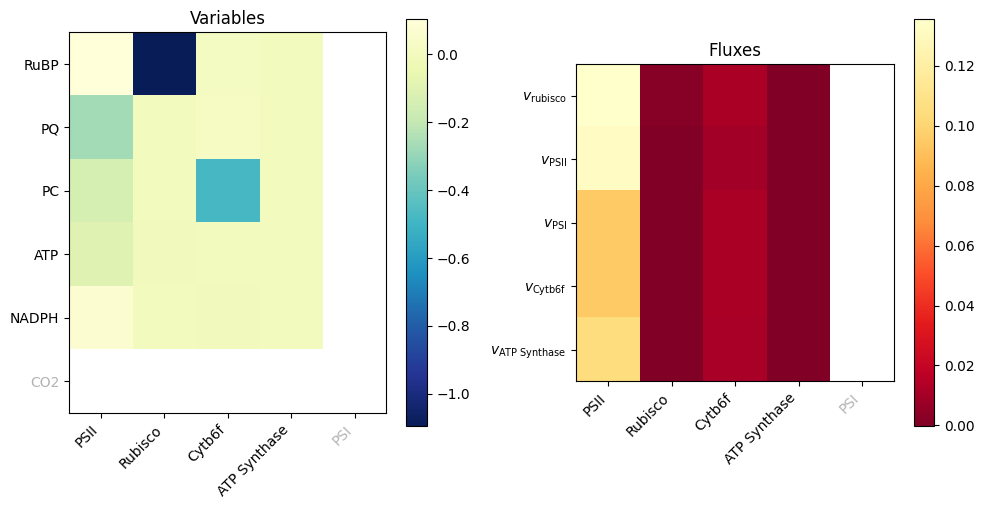

In [6]:
create_mca_fig(
    model=Saadat2021(),
    coeff_psii=coeff_psii_str,
    coeff_psi=coeff_psi_str,
    coeff_rubisco=coeff_rubisco_str,
    coeff_cytb6f=coeff_cytb6f_str,
    coeff_atp_synthase=coeff_atp_synthase_str,
    rubp=rubp_str,
    co2=co2_str,
    pq=pq_str,
    pc=pc_str,
    atp=atp_str,
    nadph=nadph_str,
    v_rubisco=vc_str,
    v_psii=v_psii_str,
    v_psi=v_psi_str,
    v_cytb6f=v_cytb6f_str,
    v_atp_synthase=v_atp_synthase_str,
)

save_fig("mca")

# PAM Fitting

Trying pam-simulation with 200 time points per step.


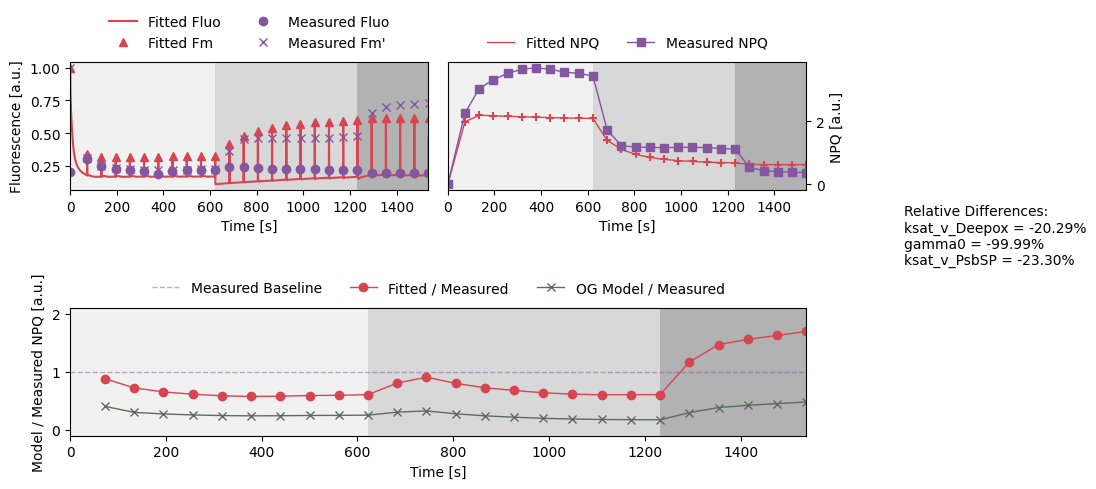

In [7]:
create_pamfit(
    model=Saadat2021(),
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=npq_str,
    pam_params_to_fit=["ksat_v_Deepox", "gamma0", "ksat_v_PsbSP"]
)

save_fig("fitting")